In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [8]:
# Load in the training set
training_set = pd.read_csv("train_data_20.csv")
#training_set.hist_user_behavior_reason_start = training_set.hist_user_behavior_reason_start.astype('category')
#training_set.hist_user_behavior_reason_end = training_set.hist_user_behavior_reason_end.astype('category')
#training_set.context_type = training_set.context_type.astype('category')
#training_set.date = training_set.date.apply(pd.to_datetime)

# Load in the track features
track_data = pd.read_csv("track_feats.csv")

# Using skip_2 as the ground truth
training_set['skipped'] = (training_set.skip_2 | training_set.skip_1).astype('int32')
training_set = training_set.drop(columns=['skip_1','skip_2','skip_3','not_skipped'])
training_set.head()

,session_id,session_position,session_length,track_id_clean,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,...,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_appload,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone,skipped
0,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.000000,1.0,t_1a73002a-d065-4a33-b98a-a3b0443310be,0,0,0,0,-0.164915,-0.165319,...,0,0,0,0,0,0,1,0,0,1
1,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.052632,1.0,t_1a73002a-d065-4a33-b98a-a3b0443310be,0,0,0,1,4.621190,-0.165319,...,0,0,0,0,0,0,0,0,1,0
2,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.105263,1.0,t_16bc2816-8daf-449a-a0f7-93ee884ffdda,0,0,1,1,-0.164915,-0.165319,...,0,0,0,0,0,1,0,0,0,1
3,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.157895,1.0,t_71d34c2f-1c87-43df-83ba-00832e12194c,0,1,0,0,-0.164915,-0.165319,...,0,0,0,0,1,0,0,0,0,1
4,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.210526,1.0,t_a66ea088-b357-449a-8a1e-64dd0b8d6cb5,1,1,0,0,-0.164915,-0.165319,...,0,0,0,0,1,0,0,0,0,1


In [9]:
track_data.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_7f435320-5d3b-497d-9346-0c97429af2b9,3.866097,0.441176,-0.403765,0.075846,0.499848,0.494943,0.461215,-0.208611,0.563252,...,0.571429,0.468440,1.034540,-1.040880,-1.281460,-0.375163,1.442307,0.045940,-0.443245,-0.243705
1,t_2a7b6393-ebec-4e1f-a53f-2ad842532c99,1.512969,0.308824,0.314153,0.085482,0.450139,0.457034,0.663219,-0.305010,0.767307,...,0.571429,0.655369,0.834594,-0.653568,-0.483168,-0.538935,1.247153,0.414248,-0.468285,-0.931875
2,t_949441c4-4920-4eed-b929-2d67d37b7bd9,-1.332280,0.485294,0.001032,0.002274,0.243778,0.229295,0.290262,-1.181899,0.958647,...,0.571429,0.293100,0.846650,0.123691,-2.692681,-0.770798,1.533066,-0.173705,-0.402540,1.181761
3,t_63eae5ac-744a-46ee-b719-0db8e70d6f7f,-0.712162,0.485294,0.558944,0.005024,0.338580,0.331703,0.348846,-0.795663,0.886674,...,0.571429,0.387131,0.920349,0.335177,-2.631787,-1.033223,1.549514,-0.036511,-0.488062,1.028883
4,t_a0747d21-6042-4af7-a21d-aa7cd1a8094e,-1.629474,0.573529,-0.356946,0.962717,0.130125,0.092335,0.170027,-2.024206,0.005674,...,0.428571,0.030858,2.238796,-3.259609,-2.378984,1.288895,-1.053248,-3.132837,0.946820,-0.623612


In [10]:
track_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316702 entries, 0 to 316701
Data columns (total 30 columns):
track_id                  316702 non-null object
duration                  316702 non-null float64
release_year              316702 non-null float64
us_popularity_estimate    316702 non-null float64
acousticness              316702 non-null float64
beat_strength             316702 non-null float64
bounciness                316702 non-null float64
danceability              316702 non-null float64
dyn_range_mean            316702 non-null float64
energy                    316702 non-null float64
flatness                  316702 non-null float64
instrumentalness          316702 non-null float64
key                       316702 non-null float64
liveness                  316702 non-null float64
loudness                  316702 non-null float64
mechanism                 316702 non-null float64
is_major                  316702 non-null int64
organism                  316702 non-null 

In [11]:
training_set.columns

Index(['session_id', 'session_position', 'session_length', 'track_id_clean',
       'context_switch', 'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'premium', 'context_type_catalog', 'context_type_charts',
       'context_type_editorial_playlist', 'context_type_personalized_playlist',
       'context_type_radio', 'context_type_user_collection',
       'hist_user_behavior_reason_start_appload',
       'hist_user_behavior_reason_start_backbtn',
       'hist_user_behavior_reason_start_clickrow',
       'hist_user_behavior_reason_start_endplay',
       'hist_user_behavior_reason_start_fwdbtn',
       'hist_user_behavior_reason_start_playbtn',
       'hist_user_behavior_reason_start_remote',
       'hist_user_behavior_reason_start_trackdone',
       'hist_user_behavior_reason_start_trackerror',
       'hist_user_behavior_reason_

In [12]:
track_data.iloc[:,1:] = track_data.iloc[:,1:].astype('float32')
track_data.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_7f435320-5d3b-497d-9346-0c97429af2b9,3.866097,0.441176,-0.403765,0.075846,0.499848,0.494943,0.461215,-0.208611,0.563252,...,0.571429,0.468440,1.034540,-1.040880,-1.281460,-0.375163,1.442307,0.045940,-0.443245,-0.243705
1,t_2a7b6393-ebec-4e1f-a53f-2ad842532c99,1.512969,0.308824,0.314153,0.085482,0.450139,0.457034,0.663219,-0.305010,0.767307,...,0.571429,0.655369,0.834594,-0.653568,-0.483167,-0.538935,1.247153,0.414248,-0.468285,-0.931875
2,t_949441c4-4920-4eed-b929-2d67d37b7bd9,-1.332280,0.485294,0.001032,0.002274,0.243778,0.229295,0.290262,-1.181899,0.958647,...,0.571429,0.293100,0.846650,0.123691,-2.692681,-0.770798,1.533066,-0.173705,-0.402540,1.181761
3,t_63eae5ac-744a-46ee-b719-0db8e70d6f7f,-0.712162,0.485294,0.558944,0.005024,0.338580,0.331703,0.348846,-0.795663,0.886674,...,0.571429,0.387131,0.920349,0.335177,-2.631788,-1.033223,1.549514,-0.036511,-0.488062,1.028883
4,t_a0747d21-6042-4af7-a21d-aa7cd1a8094e,-1.629474,0.573529,-0.356946,0.962717,0.130125,0.092335,0.170027,-2.024206,0.005674,...,0.428571,0.030858,2.238796,-3.259609,-2.378984,1.288895,-1.053248,-3.132838,0.946820,-0.623612


In [13]:
# Join the two together
session_data = (training_set[['session_id','session_position','track_id_clean', 'skipped']]
    .merge( track_data, how='left',left_on=['track_id_clean'], right_on=['track_id']).drop(columns='track_id_clean'))
session_data.head()

,session_id,session_position,skipped,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.000000,1,t_1a73002a-d065-4a33-b98a-a3b0443310be,-1.163568,1.0,0.715581,0.011384,0.779074,0.836964,...,0.571429,0.328722,-1.577071,0.786764,0.806604,0.254515,-0.863171,0.077358,-0.904268,0.592306
1,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.052632,0,t_1a73002a-d065-4a33-b98a-a3b0443310be,-1.163568,1.0,0.715581,0.011384,0.779074,0.836964,...,0.571429,0.328722,-1.577071,0.786764,0.806604,0.254515,-0.863171,0.077358,-0.904268,0.592306
2,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.105263,1,t_16bc2816-8daf-449a-a0f7-93ee884ffdda,-0.109025,1.0,0.715575,0.190542,0.497857,0.498487,...,0.571429,0.670523,-0.901194,0.958794,0.716827,-0.343279,-0.641036,0.672574,-0.441026,0.531172
3,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.157895,1,t_71d34c2f-1c87-43df-83ba-00832e12194c,-0.327845,1.0,0.715527,0.696750,0.344195,0.355678,...,0.571429,0.443155,0.193965,0.945955,0.374236,-1.195639,-0.181855,0.975532,-0.513956,-0.527603
4,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.210526,1,t_a66ea088-b357-449a-8a1e-64dd0b8d6cb5,0.202982,1.0,0.715583,0.349092,0.483979,0.487409,...,0.571429,0.218147,-1.335184,0.884475,0.466910,-0.064535,-0.758634,-0.031635,-1.176805,0.475216


In [17]:
full_session_data = pd.concat((
    session_data,
    session_data.drop(columns=['track_id'])\
        .groupby('session_id')\
        .shift(1)\
        .rename(columns={c:f"previous_{c}" for c in session_data.columns})
), axis=1)
full_session_data.head()

,session_id,session_position,skipped,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,...,previous_time_signature,previous_valence,previous_acoustic_vector_0,previous_acoustic_vector_1,previous_acoustic_vector_2,previous_acoustic_vector_3,previous_acoustic_vector_4,previous_acoustic_vector_5,previous_acoustic_vector_6,previous_acoustic_vector_7
0,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.000000,1,t_1a73002a-d065-4a33-b98a-a3b0443310be,-1.163568,1.0,0.715581,0.011384,0.779074,0.836964,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.052632,0,t_1a73002a-d065-4a33-b98a-a3b0443310be,-1.163568,1.0,0.715581,0.011384,0.779074,0.836964,...,0.571429,0.328722,-1.577071,0.786764,0.806604,0.254515,-0.863171,0.077358,-0.904268,0.592306
2,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.105263,1,t_16bc2816-8daf-449a-a0f7-93ee884ffdda,-0.109025,1.0,0.715575,0.190542,0.497857,0.498487,...,0.571429,0.328722,-1.577071,0.786764,0.806604,0.254515,-0.863171,0.077358,-0.904268,0.592306
3,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.157895,1,t_71d34c2f-1c87-43df-83ba-00832e12194c,-0.327845,1.0,0.715527,0.696750,0.344195,0.355678,...,0.571429,0.670523,-0.901194,0.958794,0.716827,-0.343279,-0.641036,0.672574,-0.441026,0.531172
4,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.210526,1,t_a66ea088-b357-449a-8a1e-64dd0b8d6cb5,0.202982,1.0,0.715583,0.349092,0.483979,0.487409,...,0.571429,0.443155,0.193965,0.945955,0.374236,-1.195639,-0.181855,0.975532,-0.513956,-0.527603


In [18]:
# Examine the columns
full_session_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1181560 entries, 0 to 1181559
Data columns (total 64 columns):
session_id                         1181560 non-null object
session_position                   1181560 non-null float64
skipped                            1181560 non-null int32
track_id                           1181560 non-null object
duration                           1181560 non-null float32
release_year                       1181560 non-null float32
us_popularity_estimate             1181560 non-null float32
acousticness                       1181560 non-null float32
beat_strength                      1181560 non-null float32
bounciness                         1181560 non-null float32
danceability                       1181560 non-null float32
dyn_range_mean                     1181560 non-null float32
energy                             1181560 non-null float32
flatness                           1181560 non-null float32
instrumentalness                   1181560 non-null

In [19]:
full_session_data.isna().sum()

session_id                        0
session_position                  0
skipped                           0
track_id                          0
duration                          0
                              ...  
previous_acoustic_vector_3    59078
previous_acoustic_vector_4    59078
previous_acoustic_vector_5    59078
previous_acoustic_vector_6    59078
previous_acoustic_vector_7    59078
Length: 64, dtype: int64

In [21]:
full_session_data.corr()

,session_position,skipped,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,...,previous_time_signature,previous_valence,previous_acoustic_vector_0,previous_acoustic_vector_1,previous_acoustic_vector_2,previous_acoustic_vector_3,previous_acoustic_vector_4,previous_acoustic_vector_5,previous_acoustic_vector_6,previous_acoustic_vector_7
session_position,1.000000,0.048475,-0.003288,-0.001580,-0.007306,-0.000450,-0.005119,-0.004753,-0.004216,-0.004991,...,-0.001942,0.000589,0.003107,-0.002074,-0.002995,0.000175,0.000732,-0.000402,0.004066,0.000846
skipped,0.048475,1.000000,0.020139,-0.012389,-0.010001,-0.032551,0.009331,0.010998,0.015036,0.011035,...,0.015212,0.008078,-0.040816,0.038615,0.030606,0.011541,-0.009221,-0.004163,-0.015006,0.004405
duration,-0.003288,0.020139,1.000000,-0.157437,-0.027315,-0.074708,-0.136415,-0.137855,-0.150105,-0.137441,...,0.009985,-0.019294,0.085424,-0.050343,-0.027713,-0.056862,0.045378,0.057016,0.008001,-0.050266
release_year,-0.001580,-0.012389,-0.157437,1.000000,0.122552,-0.049275,0.130513,0.168722,0.198729,0.180050,...,0.020186,-0.151783,-0.329867,0.384300,0.216532,0.015169,-0.396971,0.062019,-0.057702,0.326246
us_popularity_estimate,-0.007306,-0.010001,-0.027315,0.122552,1.000000,-0.037289,0.075193,0.081672,0.088110,0.078549,...,0.021480,-0.043327,-0.126382,0.127790,0.083919,-0.022995,-0.096913,0.031599,-0.109099,0.054232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
previous_acoustic_vector_3,0.000175,0.011541,-0.056862,0.015169,-0.022995,0.114440,0.340749,0.381651,0.275773,0.355531,...,-0.080051,0.208412,-0.530133,-0.262978,0.382812,1.000000,-0.006906,-0.771740,0.314394,0.153903
previous_acoustic_vector_4,0.000732,-0.009221,0.045378,-0.396971,-0.096913,0.088759,-0.196737,-0.221761,-0.207109,-0.220970,...,-0.160417,0.307984,0.545062,-0.328674,-0.323933,-0.006906,1.000000,-0.047530,0.380996,-0.589628
previous_acoustic_vector_5,-0.000402,-0.004163,0.057016,0.062019,0.031599,-0.130603,-0.222131,-0.260096,-0.141402,-0.262222,...,0.104120,-0.076440,0.346270,0.353068,0.074554,-0.771740,-0.047530,1.000000,-0.008854,0.033051
previous_acoustic_vector_6,0.004066,-0.015006,0.008001,-0.057702,-0.109099,0.150283,-0.097794,-0.099488,-0.089715,-0.107301,...,-0.162887,0.264683,0.319029,-0.147441,0.211347,0.314394,0.380996,-0.008854,1.000000,-0.065614


In [47]:
# Split the data:
# df -> X, y -> Train, Test, Val
X = full_session_data.drop(columns=["skipped","session_id","track_id"]).fillna(-9999)
y = full_session_data.skipped
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=1)
X.head(20)

,session_position,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,previous_time_signature,previous_valence,previous_acoustic_vector_0,previous_acoustic_vector_1,previous_acoustic_vector_2,previous_acoustic_vector_3,previous_acoustic_vector_4,previous_acoustic_vector_5,previous_acoustic_vector_6,previous_acoustic_vector_7
0,0.000000,-1.163568,1.0,0.715581,0.011384,0.779074,0.836964,0.901467,2.076821,0.522463,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
1,0.052632,-1.163568,1.0,0.715581,0.011384,0.779074,0.836964,0.901467,2.076821,0.522463,...,0.571429,0.328722,-1.577071,0.786764,0.806604,0.254515,-0.863171,0.077358,-0.904268,0.592306
2,0.105263,-0.109025,1.0,0.715575,0.190542,0.497857,0.498487,0.687340,-0.174502,0.791714,...,0.571429,0.328722,-1.577071,0.786764,0.806604,0.254515,-0.863171,0.077358,-0.904268,0.592306
3,0.157895,-0.327845,1.0,0.715527,0.696750,0.344195,0.355678,0.552530,-0.649624,0.585964,...,0.571429,0.670523,-0.901194,0.958794,0.716827,-0.343279,-0.641036,0.672574,-0.441026,0.531172
4,0.210526,0.202982,1.0,0.715583,0.349092,0.483979,0.487409,0.510576,-0.205536,0.566101,...,0.571429,0.443155,0.193965,0.945955,0.374236,-1.195639,-0.181855,0.975532,-0.513956,-0.527603
5,0.263158,0.202982,1.0,0.715583,0.349092,0.483979,0.487409,0.510576,-0.205536,0.566101,...,0.571429,0.218147,-1.335184,0.884475,0.466910,-0.064535,-0.758634,-0.031635,-1.176805,0.475216
6,0.315789,-0.701010,1.0,0.715555,0.076917,0.591405,0.586605,0.671390,0.148972,0.528879,...,0.571429,0.218147,-1.335184,0.884475,0.466910,-0.064535,-0.758634,-0.031635,-1.176805,0.475216
7,0.368421,-0.579663,1.0,0.715553,0.041436,0.502090,0.579240,0.665491,0.431255,0.650538,...,0.571429,0.203130,-1.289834,0.428784,0.172574,0.234164,-0.611737,-0.450886,-1.220879,0.445106
8,0.421053,0.430635,1.0,0.715347,0.038102,0.644724,0.644714,0.741898,0.419676,0.579479,...,0.571429,0.237295,-1.560248,0.788792,0.466616,0.196532,-0.845067,-0.315630,-1.209051,0.503672
9,0.473684,-0.383212,1.0,0.715478,0.115362,0.406843,0.391453,0.593567,-0.619540,0.797661,...,0.571429,0.502044,-1.556527,0.724352,0.502061,0.309811,-0.690706,-0.426975,-1.150663,0.396145


In [22]:
# Train a Random Forest model and score
rfc = RandomForestClassifier(n_estimators=100).fit(X_train,y_train)

print("RF Train score: %s" % rfc.score(X_train,y_train))
print("RF Val score:   %s" % rfc.score(X_val,y_val))
print("RF Test score:  %s" % rfc.score(X_test,y_test))

RF Train score: 0.9740266438155086
RF Val score:   0.7266860618883894
RF Test score:  0.7259809065980568


```
Random Forest Train score: 0.9762757927459211
Random Forest Val score:   0.7082759390938536
Random Forest Test score:  0.7089289969025494
```

Much better performance – let's look at the feature importance and then try a few other tree models for comparison...

In [23]:
# Train a XGBoost model and score
xgb = XGBClassifier(
    n_estimators=100000
).fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train),(X_val, y_val)],
    early_stopping_rounds=10,
    verbose=True
)

print("XGB Train score: %s" % xgb.score(X_train,y_train))
print("XGB Val score:   %s" % xgb.score(X_val,y_val))
print("XGB Test score:  %s" % xgb.score(X_test,y_test))

[0]	validation_0-error:0.253955	validation_1-error:0.253071
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.253955	validation_1-error:0.253071
[2]	validation_0-error:0.253955	validation_1-error:0.253071
[3]	validation_0-error:0.253955	validation_1-error:0.253071
[4]	validation_0-error:0.253955	validation_1-error:0.253071
[5]	validation_0-error:0.253955	validation_1-error:0.253071
[6]	validation_0-error:0.253955	validation_1-error:0.253071
[7]	validation_0-error:0.253955	validation_1-error:0.253071
[8]	validation_0-error:0.253955	validation_1-error:0.253071
[9]	validation_0-error:0.253955	validation_1-error:0.253071
[10]	validation_0-error:0.253955	validation_1-error:0.253071
Stopping. Best iteration:
[0]	validation_0-error:0.253955	validation_1-error:0.253071

XGB Train score: 0.7460453479115258
XGB Val score:   0.7469293837609098
XGB Test score:  0.

In [32]:
for pair in sorted(zip(X.columns,xgb.feature_importances_),key=lambda p:p[1],reverse=True):
    print("%30s | % .8f" % pair)

              previous_skipped |  0.95263219
              session_position |  0.00787542
previous_us_popularity_estimate |  0.00642667
     previous_instrumentalness |  0.00406126
    previous_acoustic_vector_2 |  0.00392764
             previous_loudness |  0.00341315
    previous_acoustic_vector_1 |  0.00316702
    previous_acoustic_vector_0 |  0.00304932
              instrumentalness |  0.00296333
                  release_year |  0.00271979
          previous_speechiness |  0.00266908
        us_popularity_estimate |  0.00265777
             previous_organism |  0.00177251
         previous_release_year |  0.00148644
                      duration |  0.00117841
                  acousticness |  0.00000000
                 beat_strength |  0.00000000
                    bounciness |  0.00000000
                  danceability |  0.00000000
                dyn_range_mean |  0.00000000
                        energy |  0.00000000
                      flatness |  0.00000000
         

In [33]:
# Train a LightGBM model and score
lgbm = LGBMClassifier(
    n_estimators=100000
).fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train),(X_val, y_val)],
    early_stopping_rounds=10,
    verbose=True
)

print()
print("LGBM Train score: %s" % lgbm.score(X_train,y_train))
print("LGBM Val score:   %s" % lgbm.score(X_val,y_val))
print("LGBM Test score:  %s" % lgbm.score(X_test,y_test))

[1]	training's binary_logloss: 0.664299	valid_1's binary_logloss: 0.664186
Training until validation scores don't improve for 10 rounds
[2]	training's binary_logloss: 0.645074	valid_1's binary_logloss: 0.644931
[3]	training's binary_logloss: 0.629357	valid_1's binary_logloss: 0.629189
[4]	training's binary_logloss: 0.616485	valid_1's binary_logloss: 0.616297
[5]	training's binary_logloss: 0.60588	valid_1's binary_logloss: 0.605669
[6]	training's binary_logloss: 0.597154	valid_1's binary_logloss: 0.596936
[7]	training's binary_logloss: 0.589961	valid_1's binary_logloss: 0.589733
[8]	training's binary_logloss: 0.583976	valid_1's binary_logloss: 0.583742
[9]	training's binary_logloss: 0.579025	valid_1's binary_logloss: 0.578798
[10]	training's binary_logloss: 0.574927	valid_1's binary_logloss: 0.574706
[11]	training's binary_logloss: 0.571537	valid_1's binary_logloss: 0.57131
[12]	training's binary_logloss: 0.568712	valid_1's binary_logloss: 0.568498
[13]	training's binary_logloss: 0.5663

[109]	training's binary_logloss: 0.549157	valid_1's binary_logloss: 0.552331
[110]	training's binary_logloss: 0.549099	valid_1's binary_logloss: 0.552315
[111]	training's binary_logloss: 0.549058	valid_1's binary_logloss: 0.552313
[112]	training's binary_logloss: 0.549023	valid_1's binary_logloss: 0.552317
[113]	training's binary_logloss: 0.548977	valid_1's binary_logloss: 0.552322
[114]	training's binary_logloss: 0.548933	valid_1's binary_logloss: 0.55232
[115]	training's binary_logloss: 0.548894	valid_1's binary_logloss: 0.55232
[116]	training's binary_logloss: 0.548853	valid_1's binary_logloss: 0.55231
[117]	training's binary_logloss: 0.548819	valid_1's binary_logloss: 0.552309
[118]	training's binary_logloss: 0.54877	valid_1's binary_logloss: 0.552311
[119]	training's binary_logloss: 0.548721	valid_1's binary_logloss: 0.552308
[120]	training's binary_logloss: 0.548673	valid_1's binary_logloss: 0.552297
[121]	training's binary_logloss: 0.548616	valid_1's binary_logloss: 0.552285
[12

LightGBM Classifier performance:
```
LGBM Train score: 0.7304338114162858
LGBM Val score:   0.7267041435538513
LGBM Test score:  0.7281391470097689
```

`LGBM` seems to have similar performance to `XGB` model (but faster).

Let's examine feature importance...

In [34]:
for pair in sorted(zip(X.columns,lgbm.feature_importances_),key=lambda p:p[1],reverse=True):
    print("%34s | % 5d" % pair)

            us_popularity_estimate |   258
   previous_us_popularity_estimate |   168
                          duration |   153
                  session_position |   132
        previous_acoustic_vector_0 |   116
                      release_year |   108
                 acoustic_vector_2 |   105
                 previous_duration |   104
                  instrumentalness |   101
                      acousticness |    95
        previous_acoustic_vector_2 |    90
                 acoustic_vector_5 |    89
                 acoustic_vector_0 |    87
                          loudness |    86
         previous_instrumentalness |    86
                 acoustic_vector_3 |    84
        previous_acoustic_vector_1 |    84
                 acoustic_vector_7 |    78
                 acoustic_vector_1 |    76
        previous_acoustic_vector_4 |    72
                 acoustic_vector_4 |    70
                           valence |    68
                 previous_loudness |    68
           

Plotting top 10 features 

In [36]:
lgbm_feature_importances = [[p[0], int(p[1])] for p in sorted(zip(X.columns,lgbm.feature_importances_),key=lambda p:p[1],reverse=True)]

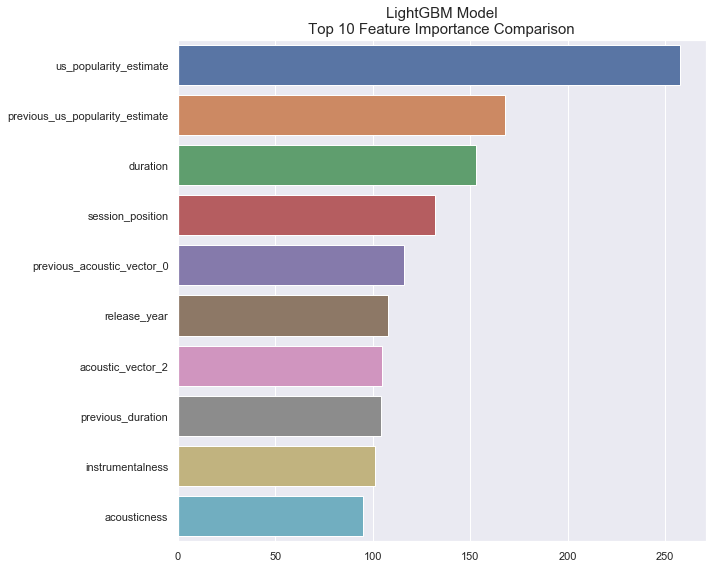

In [39]:
lgbm_feat = pd.DataFrame(lgbm_feature_importances,columns=['Feature','Importance'])

plt.figure(figsize=(10,8))
sns.barplot(
    "Importance",
    "Feature",
    data=lgbm_feat.head(10)
)
plt.title(
    "LightGBM Model\n Top 10 Feature Importance Comparison ",
    fontsize=15
)
plt.xlabel(
    "",
    fontsize=15
)
plt.ylabel(
    "",
    fontsize=15
)
# plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("lgbm_feature_importance_top10.png")
# plt.show()

In [40]:
from sklearn.metrics import confusion_matrix

In [45]:
print("Random Forest Confusion Matrix")
print(confusion_matrix(
    y_test,
    rfc.predict(X_test)
) / sum(y_test.shape))

Random Forest Confusion Matrix
[[0.31852382 0.13255357]
 [0.14146552 0.40745709]]


In [44]:
print("XGBoost Confusion Matrix")
print(confusion_matrix(
    y_test,
    xgb.predict(X_test)
) / sum(y_test.shape))

XGBoost Confusion Matrix
[[0.33727445 0.11380294]
 [0.1403145  0.40860811]]


In [43]:
print("LightGBM Confusion Matrix")
print(confusion_matrix(
    y_test,
    lgbm.predict(X_test)
) / sum(y_test.shape))

LightGBM Confusion Matrix
[[0.33709672 0.11398067]
 [0.14013254 0.40879007]]


***

Save out the `LightGBM` model

In [48]:
# # Save out the model
with open("lgbm_model_0.73TestAcc.pkl","wb") as f:    
    pickle.dump(lgbm,f)

In [49]:
# Load in the model
with open("lgbm_model_0.73TestAcc.pkl","rb") as f:
    lgbm = pickle.load(f)

In [50]:
from sklearn.metrics import accuracy_score

In [52]:
def predict_proba(X):
    predictions = (
        rfc.predict_proba(X)[:,1] +
        xgb.predict_proba(X)[:,1] +
        lgbm.predict_proba(X)[:,1]
    )
    return predictions / 4

def predict(X,threshold=0.5):
    return (predict_proba(X) > threshold).astype('float32')

def score(X,y):
    return accuracy_score(y,predict(X))

print("Ensemble Train Accuracy:  %.3f" % score(X_train,y_train))
print("Ensemble Val Accuracy:    %.3f" % score(X_val,y_val))
print("Ensemble Test Accuracy:   %.3f" % score(X_test,y_test))

Ensemble Train Accuracy:  0.791
Ensemble Val Accuracy:    0.790
Ensemble Test Accuracy:   0.791


In [53]:
ensamble_predictions = predict(X_test)

***

In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [55]:
lgbm_preds = lgbm.predict(X_test)

print("LightGBM Test Precision Score: %.3f" % precision_score(y_test,lgbm_preds))
print("LightGBM Test Recall Score:    %.3f" % recall_score(y_test,lgbm_preds))
print("LightGBM Test F1 Score:        %.3f" % f1_score(y_test,lgbm_preds))

LightGBM Test Precision Score: 0.785
LightGBM Test Recall Score:    0.747
LightGBM Test F1 Score:        0.765


In [56]:
print("Ensemble Test Precision Score: %.3f" % precision_score(y_test,ensamble_predictions))
print("Ensemble Test Recall Score:    %.3f" % recall_score(y_test,ensamble_predictions))
print("Ensemble Test F1 Score:        %.3f" % f1_score(y_test,ensamble_predictions))

Ensemble Test Precision Score: 0.928
Ensemble Test Recall Score:    0.675
Ensemble Test F1 Score:        0.781


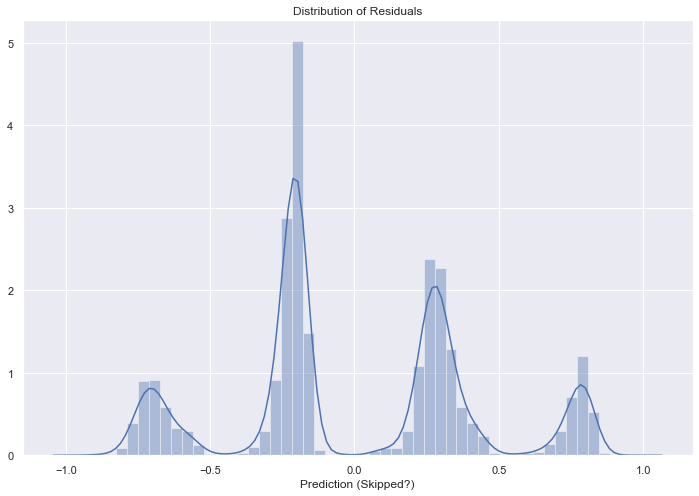

In [57]:
lgbm_probs = lgbm.predict_proba(X_test)[:,1]
lgmb_residuals = (lgbm_probs - y_test).sort_values()

plt.figure(figsize=(12,8))
sns.distplot(lgmb_residuals)
plt.title("Distribution of Residuals")
plt.xlabel("Prediction (Skipped?)")
plt.show()

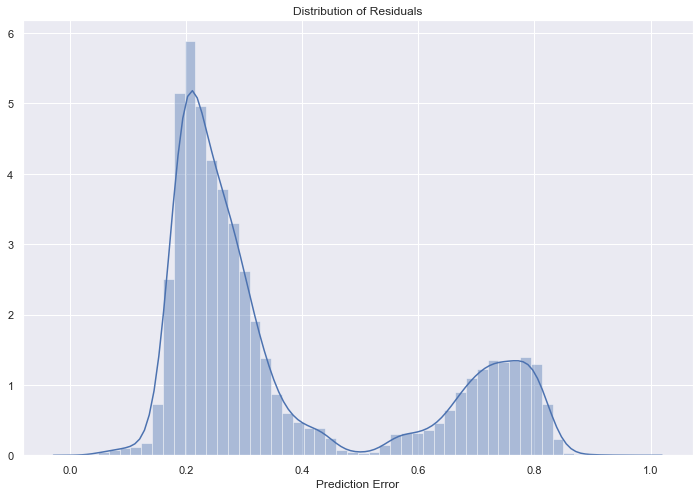

In [58]:
plt.figure(figsize=(12,8))
sns.distplot(np.abs(lgmb_residuals))
plt.title("Distribution of Residuals")
plt.xlabel("Prediction Error")
plt.show()